### Importing libraries

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Getting and Loading Data

In [9]:
pd.set_option('display.max_columns',None)

df = pd.read_csv('data/Telco-Customer-Churn.csv')

print('First 5 rows in dataset')

df.head()

First 5 rows in dataset


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
print("dataset information:")
df.info()

dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

In [12]:
print('Statistical Summary for numerical columns: ')
df.describe()

Statistical Summary for numerical columns: 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [16]:
problematic_rows = df[df['TotalCharges'] == ' ']
print(f"Found {len(problematic_rows)} rows where TotalCharges is a space.")
display(problematic_rows)

Found 11 rows where TotalCharges is a space.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### Visualizing

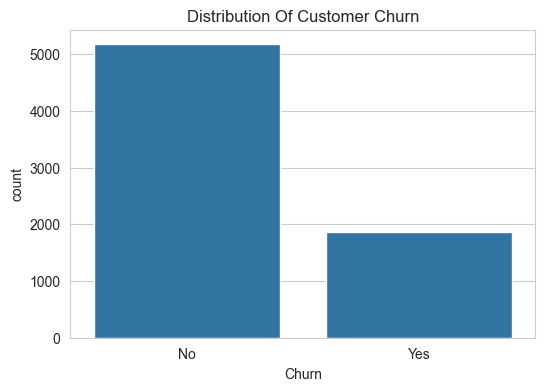

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Distribution Of Customer Churn')
plt.show()

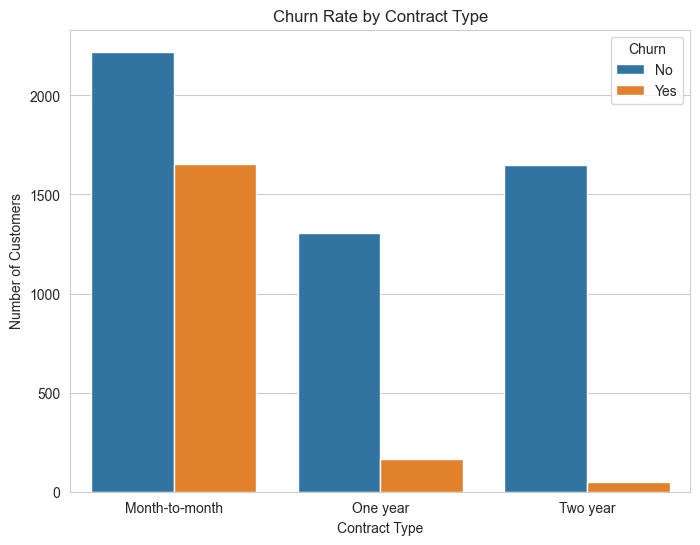

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

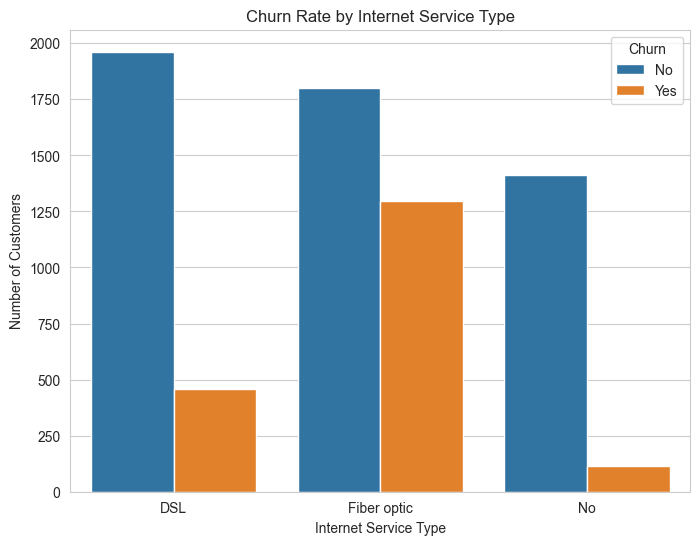

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.show()

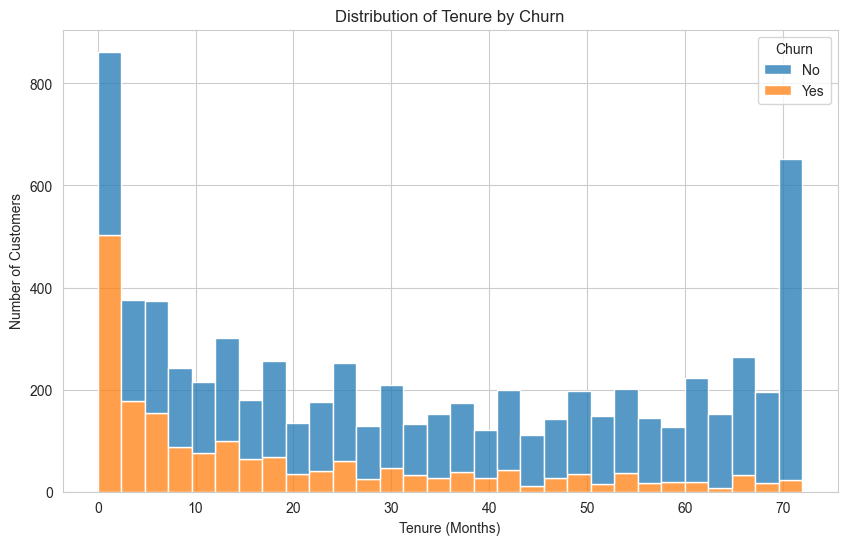

In [23]:
plt.figure(figsize=(10, 6))
# We use 'multiple="stack"' to stack the Churn 'Yes' and 'No' bars on top of each other
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

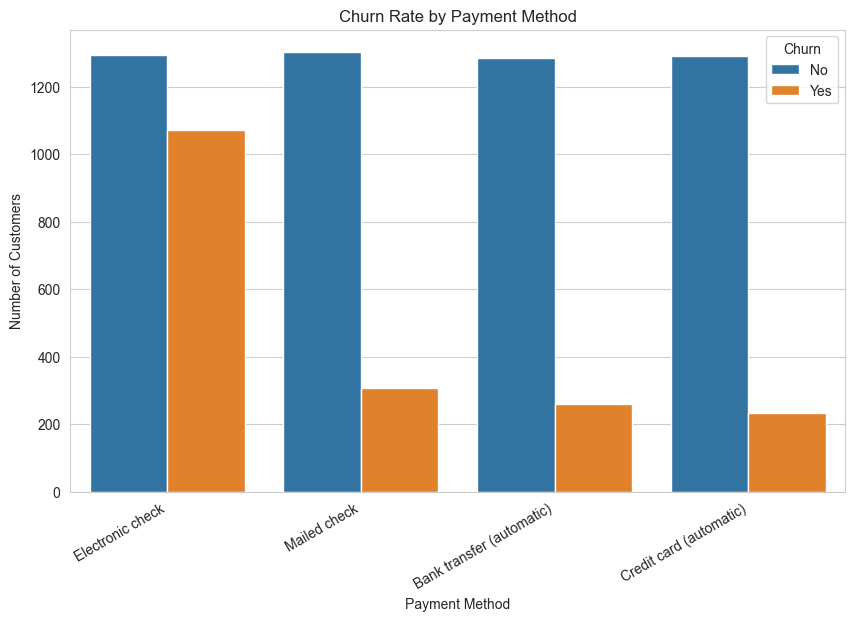

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
# Rotating the x-axis labels to prevent them from overlapping
plt.xticks(rotation=30, ha='right')
plt.ylabel('Number of Customers')
plt.show()

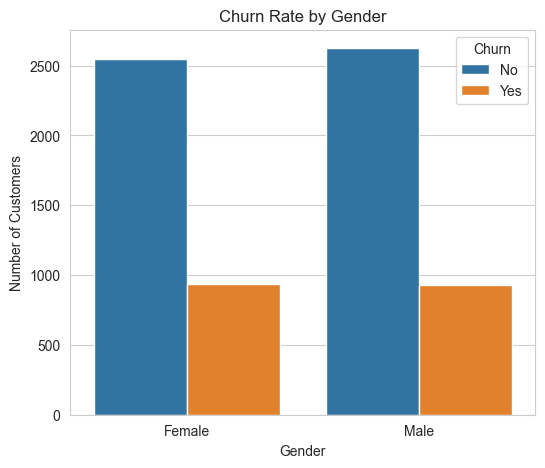

In [25]:
plt.figure(figsize=(6, 5))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

In [27]:
# Let's see what's in our feature list from before
categorical_features = [col for col in df.columns if df[col].dtype == 'object' and col != 'Churn']

print("List of features the code is trying to plot:")
print(categorical_features)
print(f"\nTotal number of features to plot: {len(categorical_features)}")

List of features the code is trying to plot:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']

Total number of features to plot: 17


Refined list of features to plot: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Number of features to plot: 15


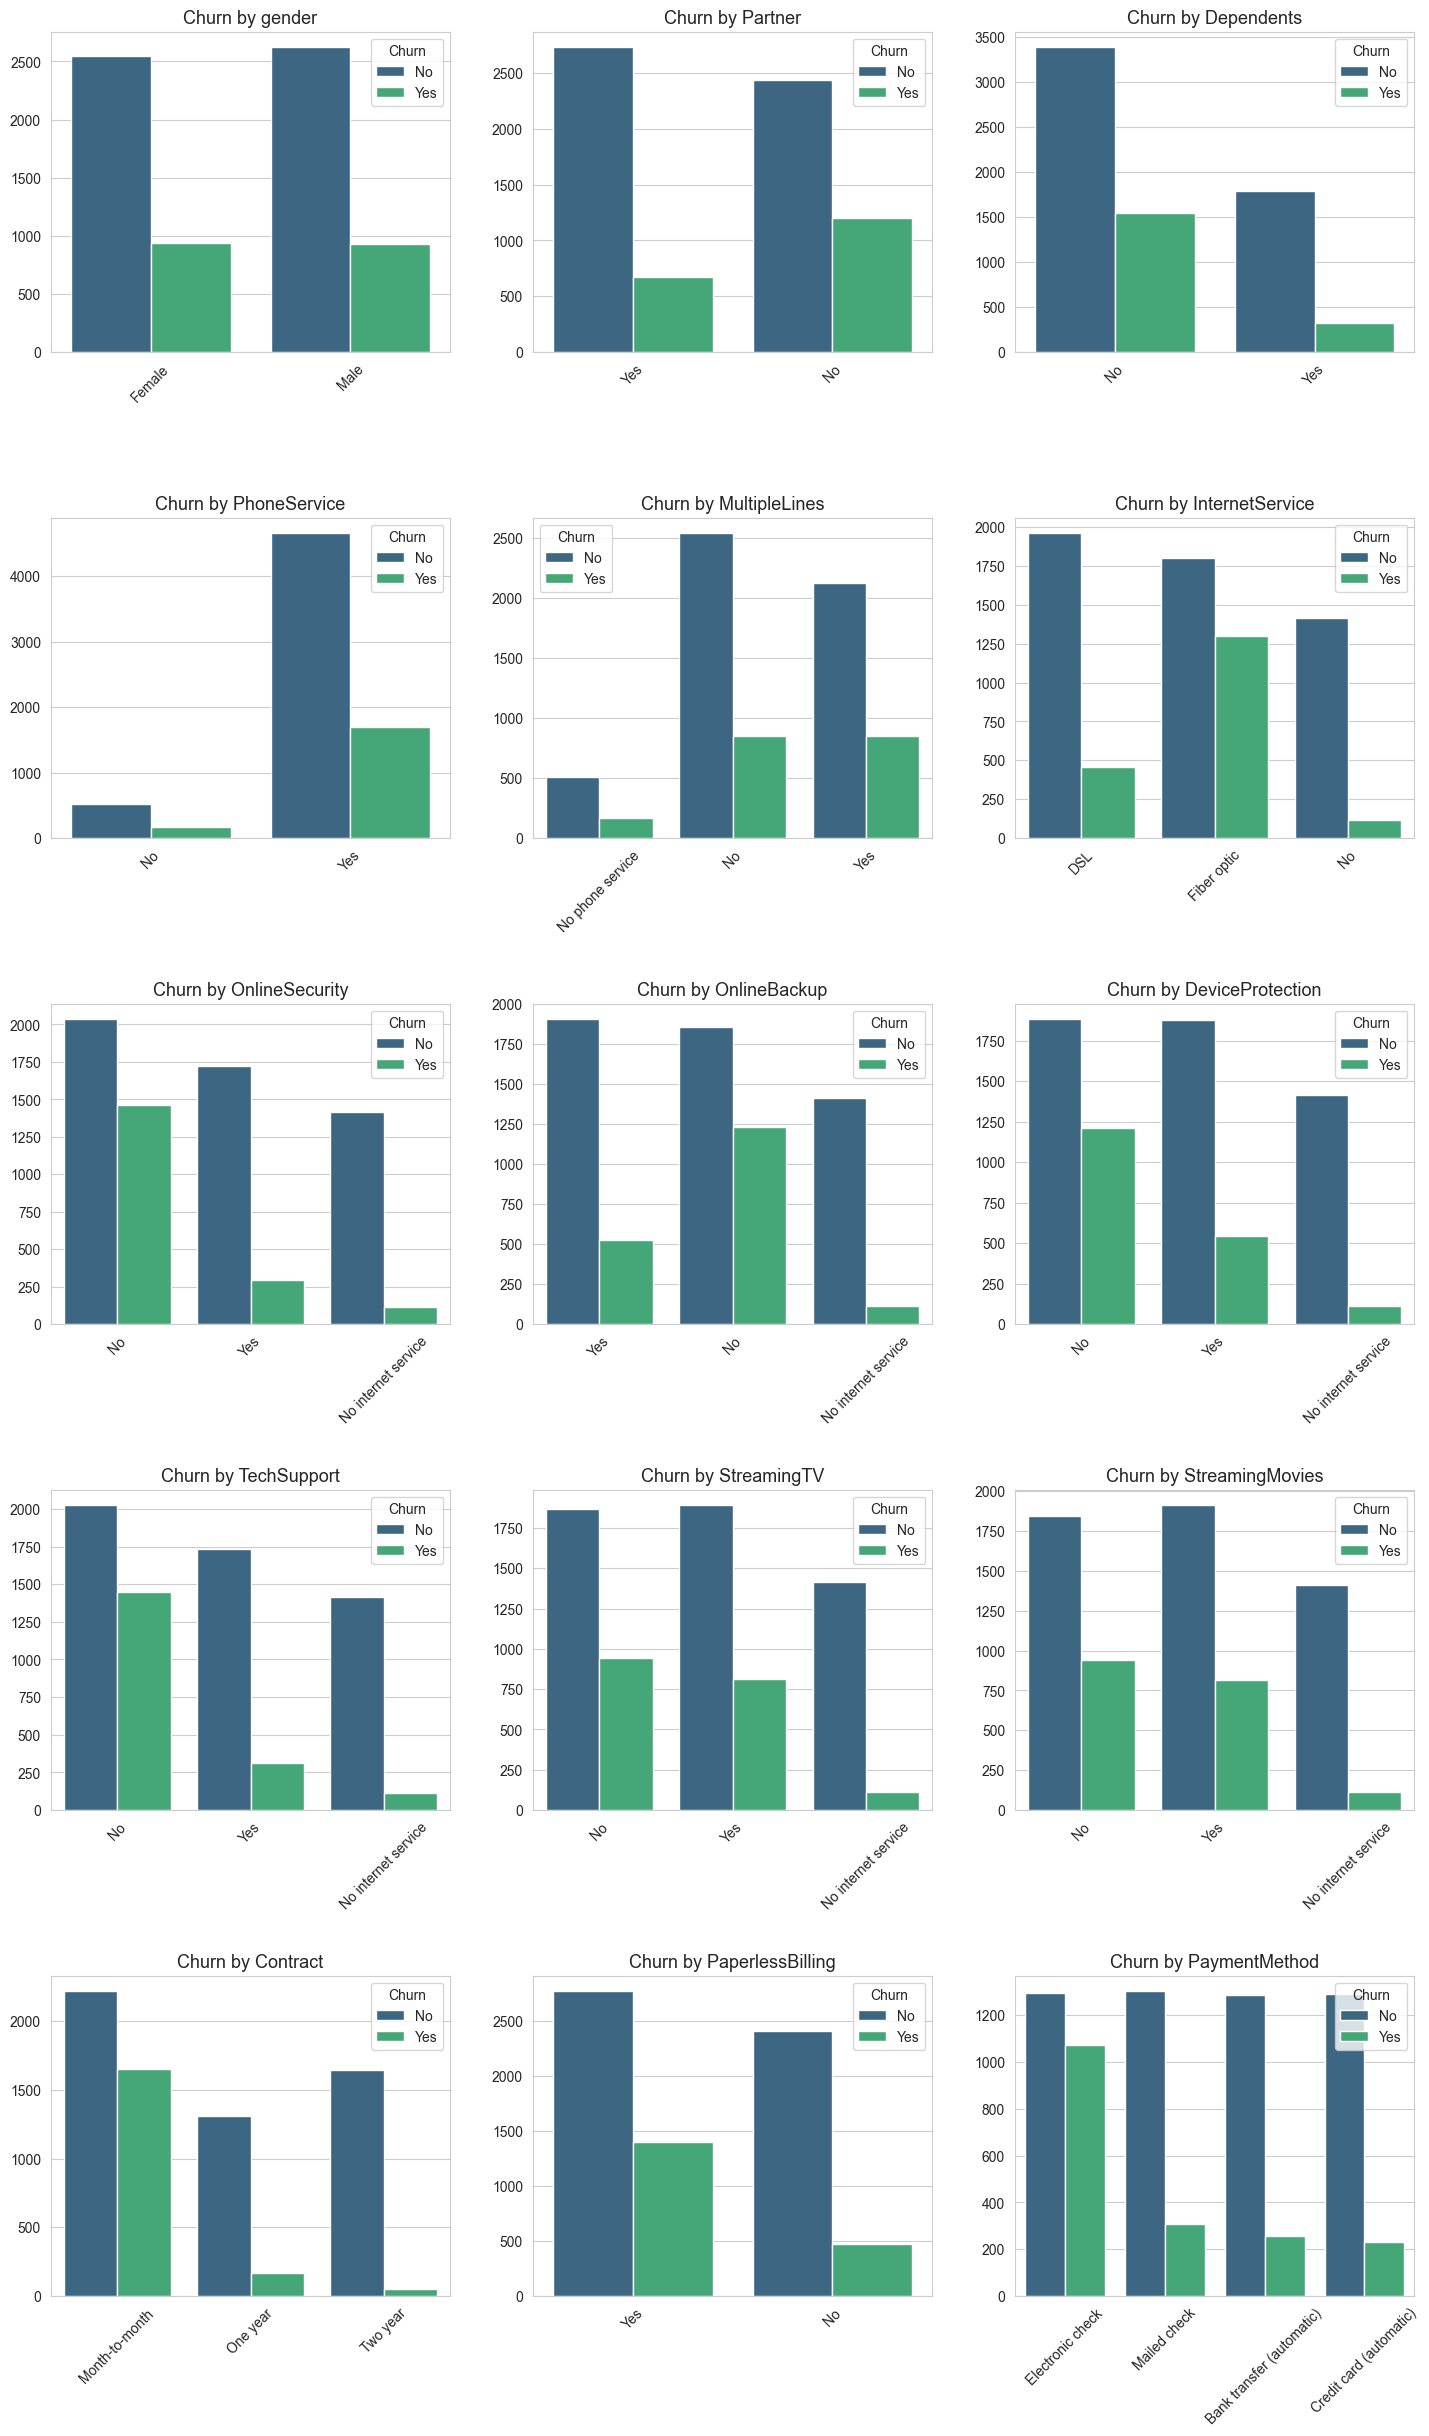

In [28]:
# --- CORRECTED CODE BLOCK ---

# 1. Refine our list of features to be more specific.
# We will exclude unique identifiers and columns that should be numeric.
cols_to_exclude = ['customerID', 'TotalCharges', 'Churn']
categorical_features_refined = [
    col for col in df.columns 
    if df[col].dtype == 'object' and col not in cols_to_exclude
]

# Let's verify our new list (this should now show 15 features)
print(f"Refined list of features to plot: {categorical_features_refined}")
print(f"Number of features to plot: {len(categorical_features_refined)}")

# 2. Create a grid that fits our 15 features perfectly (5 rows, 3 columns).
n_cols = 3
n_rows = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 25))
axes = axes.flatten()

# 3. Loop through the refined list and plot.
for i, col in enumerate(categorical_features_refined):
    ax = axes[i]
    sns.countplot(x=col, hue='Churn', data=df, ax=ax, palette='viridis') # Added a different color palette for fun
    ax.set_title(f'Churn by {col}', fontsize=13)
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylabel('')
    ax.set_xlabel('') # Hide x-axis label for cleanliness

# This command automatically adjusts subplot params so that the subplots fit nicely.
plt.tight_layout(pad=3.0)

# Display the master plot
plt.show()

In [29]:
# Create a clean copy of the dataframe for preprocessing
df_clean = df.copy()

In [30]:
# Convert TotalCharges to numeric, coercing errors to NaN (which the spaces will become)
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# We know that the NaNs correspond to customers with 0 tenure. The logical fill value is 0.
df_clean['TotalCharges'] = df_clean['TotalCharges'].fillna(0)

# Let's check the info again to confirm the fix
print("Data types after fixing TotalCharges:")
df_clean.info()

Data types after fixing TotalCharges:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pape

In [31]:
# Identify binary categorical columns (excluding SeniorCitizen which is already 0/1)
binary_cols = [
    col for col in df_clean.columns 
    if df_clean[col].dtype == 'object' and df_clean[col].nunique() == 2
]

# Let's see which columns we are about to change
print(f"Binary columns to be encoded: {binary_cols}")

# Apply the mapping
# We'll map 'Yes' to 1, 'No' to 0 for most columns
# and 'Female' to 1, 'Male' to 0 for the gender column
for col in binary_cols:
    df_clean[col] = df_clean[col].apply(lambda x: 1 if x == 'Yes' or x == 'Female' else 0)

# Let's look at the first few rows to see the result
print("\nDataFrame after encoding binary columns:")
display(df_clean.head())

Binary columns to be encoded: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

DataFrame after encoding binary columns:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [33]:
# --- FINAL CORRECTED PREPROCESSING CODE ---

# Start with a fresh copy of the original dataframe
df_preprocessed = df.copy()

# Step 1: Drop the customerID column as it's not a predictive feature
df_preprocessed = df_preprocessed.drop('customerID', axis=1)
print("Dropped 'customerID' column.")

# Step 2: Fix TotalCharges (convert to number, fill missing values)
df_preprocessed['TotalCharges'] = pd.to_numeric(df_preprocessed['TotalCharges'], errors='coerce')
df_preprocessed['TotalCharges'] = df_preprocessed['TotalCharges'].fillna(0)
print("Fixed 'TotalCharges' column.")

# Step 3: Encode the target variable 'Churn' separately for clarity
df_preprocessed['Churn'] = df_preprocessed['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
print("Encoded target variable 'Churn'.")

# Step 4: Use get_dummies to handle ALL other categorical columns at once.
# This will correctly handle binary ('gender') and multi-category ('Contract', 'TechSupport') columns.
df_encoded = pd.get_dummies(df_preprocessed, drop_first=True)
print("Applied one-hot encoding to all remaining categorical features.")


# --- Let's check the final, clean result ---
print("\nShape of the final, encoded DataFrame:", df_encoded.shape)

print("\nFirst 5 rows of the final DataFrame:")
display(df_encoded.head())

print("\nFinal check of data types (all should be numbers):")
df_encoded.info()

Dropped 'customerID' column.
Fixed 'TotalCharges' column.
Encoded target variable 'Churn'.
Applied one-hot encoding to all remaining categorical features.

Shape of the final, encoded DataFrame: (7043, 31)

First 5 rows of the final DataFrame:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False



Final check of data types (all should be numbers):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes   